In [92]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [100]:
import matplotlib.pyplot as plt

concentration = [
    0.000199, 0.000179, 0.000159, 0.000139, 0.000119, 0.0000995,
    0.0000796, 0.0000597, 0.0000398, 0.0000199
]
overall_resistance = [
    4.605, 4.158, 3.947, 3.632, 3.211, 2.974,
    2.605, 2.263, 1.921, 1.579
]

percent_transmittance = [
    21.5, 24.1, 25.3, 27.4, 31.2, 33.8,
    38.4, 44.3, 51.9, 63.3
]

absorbance = [
    0.668, 0.618, 0.597, 0.562, 0.506, 0.471,
    0.416, 0.354, 0.285, 0.198
]

concentrations = [0.0004, 0.00032, 0.00024, 0.00016, 0.00008]
absorbances = [0.750, 0.602, 0.447, 0.299, 0.150]

exog = concentrations
endog = absorbances
xlabel = "Concentration(M)"
ylabel = "Absorbance"
title = "Absorbance vs. Sample Concentration by Rahul"
step = 0.000001

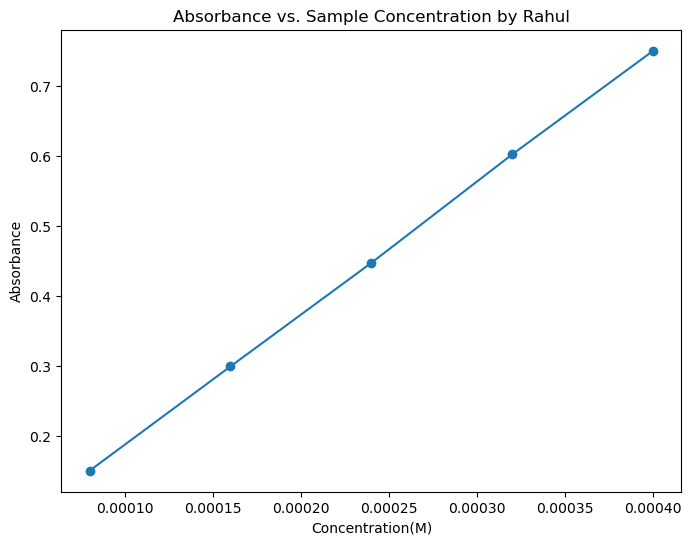

In [101]:
plt.figure(figsize=(8,6))
plt.plot(exog, endog, marker='o', linestyle='-')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

In [102]:
import statsmodels.api as sm

exog_mod = sm.add_constant(exog, prepend=False)
model = sm.OLS(np.array(endog),np.array(exog_mod))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.510e+04
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           1.71e-07
Time:                        16:38:15   Log-Likelihood:                 25.194
No. Observations:                   5   AIC:                            -46.39
Df Residuals:                       3   BIC:                            -47.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1878.7500      8.004    234.729      0.0

c:\Users\rahul\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [103]:
X_new = np.arange(start=min(exog), stop=max(exog), step=step)
X_mod = sm.add_constant(X_new, prepend=False)
Y_new = res.predict(X_mod)

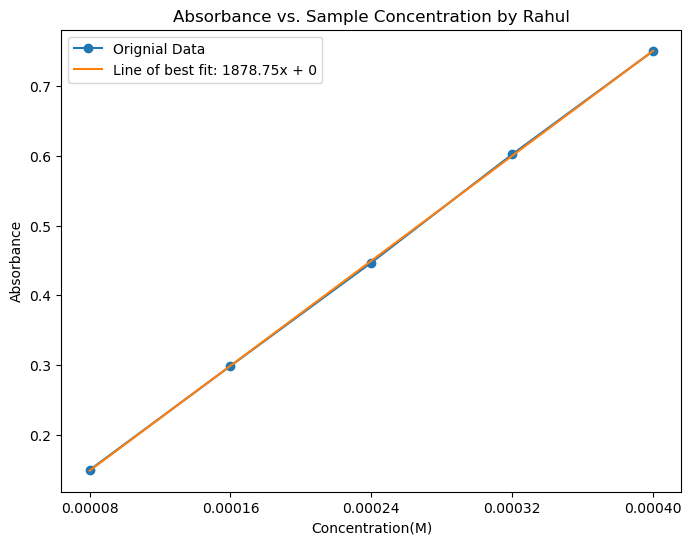

In [107]:
bestfit = f"Line of best fit: {res.params[0]:.2f}x + 0"

plt.figure(figsize=(8,6))
plt.plot(exog, endog, marker='o', linestyle='-', label='Orignial Data')
plt.plot(X_new, Y_new, label=bestfit)
plt.xticks(concentrations)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.legend()
plt.show()